In [1]:
import pandas as pd
import numpy as np

# Conceptos Básicos

# Series Pandas


In [2]:
numeros = [3,4,5,6,7]
serie = pd.Series(numeros)
serie, type(serie)

(0    3
 1    4
 2    5
 3    6
 4    7
 dtype: int64,
 pandas.core.series.Series)

In [3]:
data = {
    'Nombre' : ['Ana', 'Juan', 'Pedro', 'Maria', 'Luis'],
    'Edad' : [22, 24, 28, 25,19],
    'Ciudad': ['Barcelona', 'Madrid', 'Valencia', 'Malaga', 'Vigo']
}
data, type(data)

({'Nombre': ['Ana', 'Juan', 'Pedro', 'Maria', 'Luis'],
  'Edad': [22, 24, 28, 25, 19],
  'Ciudad': ['Barcelona', 'Madrid', 'Valencia', 'Malaga', 'Vigo']},
 dict)

## Generamos un DataFrame a partir de un diccionario


In [4]:
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,24,Madrid
2,Pedro,28,Valencia
3,Maria,25,Malaga
4,Luis,19,Vigo


### Exportar e Importar un DataFrame


In [5]:
df.to_csv('data.csv')
import_df = pd.read_csv('data.csv',index_col=0)
import_df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,24,Madrid
2,Pedro,28,Valencia
3,Maria,25,Malaga
4,Luis,19,Vigo


## Manipulación de datos con Pandas


In [6]:
#Selección de una columna
nombre = df['Nombre']
print(nombre, type(nombre))

0      Ana
1     Juan
2    Pedro
3    Maria
4     Luis
Name: Nombre, dtype: object <class 'pandas.core.series.Series'>


In [7]:
#Seleccionar una o más columnas
df[['Nombre', 'Edad']]

,Nombre,Edad
0,Ana,22
1,Juan,24
2,Pedro,28
3,Maria,25
4,Luis,19


In [8]:
#Seleccionar por índice
fila = df.loc[2]
fila

Nombre       Pedro
Edad            28
Ciudad    Valencia
Name: 2, dtype: object

In [9]:
#Filtrar por condiciones
df[df['Edad']> 22]

,Nombre,Edad,Ciudad
1,Juan,24,Madrid
2,Pedro,28,Valencia
3,Maria,25,Malaga


In [10]:
filtro = (df['Edad'] > 22) & (df['Nombre'].str.startswith('P'))
df[filtro]

,Nombre,Edad,Ciudad
2,Pedro,28,Valencia


In [11]:
#Filtrar por query
df.query('Edad < 24')

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
4,Luis,19,Vigo


In [12]:
df[df['Nombre'].isin(['Ana', 'Mario', 'Luis'])]

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
4,Luis,19,Vigo


In [13]:
def longitud_5(Nombre):
    return len(Nombre) == 5
df[df['Nombre'].apply(longitud_5)]

,Nombre,Edad,Ciudad
2,Pedro,28,Valencia
3,Maria,25,Malaga


In [14]:
#Filtrar por edades entre 25 y 35 (incluidos)
df[df['Edad'].between(25,35)]

,Nombre,Edad,Ciudad
2,Pedro,28,Valencia
3,Maria,25,Malaga


In [15]:
data = {
    'Nombre' : ['Ana', 'Juan', 'Pedro', 'Maria', 'Luis'],
    'Edad' : [22, 24, np.nan, 25,19],
    'Ciudad': ['Barcelona', 'Madrid', 'Valencia', 'Malaga', None]
}
data, type(data)
df = pd.DataFrame(data)
df


,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,24.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,25.0,Malaga
4,Luis,19.0,None


### Valores Faltantes

In [16]:
# Rellenar los valores faltante
df_fill = df.fillna(
    {'Edad': df['Edad'].mean(), #reemplaza la edad faltande -promedio-
    'Ciudad' : 'Desconocido'}
    )
df_fill

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,24.0,Madrid
2,Pedro,22.5,Valencia
3,Maria,25.0,Malaga
4,Luis,19.0,Desconocido


In [17]:
# Eliminar filas con valores faltantes
df_sin_nan = df.dropna()
df_sin_nan

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,24.0,Madrid
3,Maria,25.0,Malaga


### Reemplazar Valores

In [18]:
# Reemplazar valores específicos de alguna columna
df_reem = df.replace(
    {'Ciudad':{None:'Desconocido'}}
)
df_reem

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,24.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,25.0,Malaga
4,Luis,19.0,Desconocido


In [19]:
# Interpolar Valores
df_interpolados = df.copy() #copia de dataframe q se ha creado
df_interpolados ['Edad'] = df['Edad'].interpolate()
df_interpolados

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,24.0,Madrid
2,Pedro,24.5,Valencia
3,Maria,25.0,Malaga
4,Luis,19.0,None


In [20]:
df_sin_nan = df.dropna()
df_sin_nan

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,24.0,Madrid
3,Maria,25.0,Malaga


### Eliminar Duplicados

In [21]:
data_duplicado = {
    'Nombre' : ['Ana', 'Juan', 'Pedro', 'Maria', 'Luis', 'Ana', 'Juan'],
    'Edad' : [22, 24, np.nan, 25,19, 22, 24],
    'Ciudad': ['Barcelona', 'Madrid', 'Valencia', 'Malaga', None, 'Barcelona', 'Madrid']
}

df_duplicado = pd.DataFrame(data_duplicado)
df_duplicado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,24.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,25.0,Malaga
4,Luis,19.0,None
5,Ana,22.0,Barcelona
6,Juan,24.0,Madrid


In [22]:
#Eliminar Duplicados
df_sin_duplicados = df_duplicado.drop_duplicates()
df_sin_duplicados

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,24.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,25.0,Malaga
4,Luis,19.0,None


### Renombrar Columnas

In [23]:
df_renombrado = df.rename (columns = {'Nombre':'Name', 
                                    'Edad':'Age', 
                                    'Ciudad':'City'}
                           )
df_renombrado

,Name,Age,City
0,Ana,22.0,Barcelona
1,Juan,24.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,25.0,Malaga
4,Luis,19.0,None


### Ordenar Columans

In [24]:
columnas_ordenadas = ['Ciudad','Edad', 'Nombre']
df_ordenado = df[columnas_ordenadas]
df_ordenado

,Ciudad,Edad,Nombre
0,Barcelona,22.0,Ana
1,Madrid,24.0,Juan
2,Valencia,NaN,Pedro
3,Malaga,25.0,Maria
4,None,19.0,Luis


### Transformación de Datos 

In [25]:
def cuadrado(x):
    return x **2

df['Edad_Cuadrado'] = df['Edad'].apply(cuadrado)
df

,Nombre,Edad,Ciudad,Edad_Cuadrado
0,Ana,22.0,Barcelona,484.0
1,Juan,24.0,Madrid,576.0
2,Pedro,NaN,Valencia,NaN
3,Maria,25.0,Malaga,625.0
4,Luis,19.0,None,361.0


### Agrupación de Datos en Pandas

In [26]:
data_2= {
    'nombre': ['Juan', 'Ana', 'Luis', 'Laura', 'Pedro','Carla'],
    'ciudad':['Madrid', 'Barcelona', 'Madrid', 'Valencia', 'Barcelona','Madrid'],
    'edad': [25, 33, 30, 28, 45, 38],
    'puntuación': [80, 90, 85, 88, 75, 91]
} 
df = pd.DataFrame(data_2)
df

,nombre,ciudad,edad,puntuación
0,Juan,Madrid,25,80
1,Ana,Barcelona,33,90
2,Luis,Madrid,30,85
3,Laura,Valencia,28,88
4,Pedro,Barcelona,45,75
5,Carla,Madrid,38,91


In [27]:
# Agrupamaiento de datos por ciudad
grouped = df.groupby('ciudad')
print(grouped.groups)

{'Barcelona': [1, 4], 'Madrid': [0, 2, 5], 'Valencia': [3]}


### Agregación de Datos

In [28]:
# Suma de las edades y puntuaciones por la ciudad
aggregated_data = grouped.agg(
    {
        'edad': 'mean',
        'puntuación':'sum'
    }
)
aggregated_data

,edad,puntuación
ciudad,,
Barcelona,39.0,165
Madrid,31.0,256
Valencia,28.0,88


In [29]:
# Funciones de agregacion personalizadas
def rango(series):
    return series.max() - series.min()

# Aplicar la función agg personalizada al grupo 
aggregated_data_custom = grouped.agg(
    {
        'edad' : rango,
        'puntuación': rango
    }
)
aggregated_data_custom

,edad,puntuación
ciudad,,
Barcelona,12,15
Madrid,13,11
Valencia,0,0


### Agregación y Agrupación en Pandas en multinivel

In [30]:
data_2['categoria'] = ['A','B','A','B','A','B']
df = pd.DataFrame(data_2)
df

,nombre,ciudad,edad,puntuación,categoria
0,Juan,Madrid,25,80,A
1,Ana,Barcelona,33,90,B
2,Luis,Madrid,30,85,A
3,Laura,Valencia,28,88,B
4,Pedro,Barcelona,45,75,A
5,Carla,Madrid,38,91,B


In [31]:
# Agrupar datos por ciudad y categorias
grouped_multi = df.groupby(['ciudad','categoria'])
grouped_multi.groups

{('Barcelona', 'A'): [4], ('Barcelona', 'B'): [1], ('Madrid', 'A'): [0, 2], ('Madrid', 'B'): [5], ('Valencia', 'B'): [3]}

In [32]:
# Calcular la suma de las edades y puntuacion por ciudad y por categoria
aggregated_data_multi = grouped_multi.agg(
    {
        'edad': 'sum',
        'puntuación':'mean'
    }
)
aggregated_data_multi

edad  puntuación
ciudad    categoria                  
Barcelona A            45        75.0
          B            33        90.0
Madrid    A            55        82.5
          B            38        91.0
Valencia  B            28        88.0

### Agregar nuevos datos a un DataFrame con Pandas

In [33]:
#Crear Dataframe de ejemplo
data_3 = {
    'nombre': ['Juan', 'Ana', 'Luis', 'Laura'],
    'edad': [25, 33, 30, 28]
}
df = pd.DataFrame(data_3)
df

,nombre,edad
0,Juan,25
1,Ana,33
2,Luis,30
3,Laura,28


In [34]:
# Agregar Columna
df['ciudad'] = ['Madrid', 'Barcelona', 'Madrid', 'Valencia']
df

,nombre,edad,ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia


In [35]:
# Generamos una nueva Fila
new_row = pd.Series(
    {'nombre':'Pedro', 
     'edad':45, 
     'ciudad':'Barcelona'}
)
# Agregamos fila al DataFrame
df = pd.concat([df, new_row.to_frame().T], ignore_index=True)
df

,nombre,edad,ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia
4,Pedro,45,Barcelona


### Combinar DataFrame

In [36]:
data_3 = {
    'nombre': ['Juan', 'Ana', 'Luis', 'Laura'],
    'edad': [25, 33, 30, 28],
    'ciudad': ['Madrid', 'Barcelona', 'Madrid', 'Valencia']
}
df1 = pd.DataFrame(data_3)

data_4 = {
    'nombre': ['Carla', 'Irene'],
    'edad': [38, 27],
    'ciudad': ['Madrid', 'Bilbao']
}
df2 = pd.DataFrame(data_4)

In [37]:
df1

,nombre,edad,ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia


In [38]:
df2

,nombre,edad,ciudad
0,Carla,38,Madrid
1,Irene,27,Bilbao


In [39]:
# Combinamos df1 y df2 
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined

,nombre,edad,ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia
4,Carla,38,Madrid
5,Irene,27,Bilbao


# Numpy

NumPy es una librería de Python especializada en el cálculo numérico y el análisis de datos, especialmente para un gran volumen de datos. La ventaja de Numpy frente a las listas predefinidas en Python es que el procesamiento de los arrays se realiza mucho más rápido (hasta 50 veces más) que las listas, lo cual la hace ideal para el procesamiento de vectores y matrices de grandes dimensiones. 
### La clase de objetos array
Un array es una estructura de datos de un mismo tipo organizada en forma de tabla o cuadrícula de distintas dimensiones.
Las dimensiones de un array también se conocen como ejes.

In [40]:
# Creación de arreglo de 1 dimensión con 6 elemetos
arr1 = np.array([1,2,3,4,5,6])
print('Arreglo de 1D: ', arr1)
print('Forma(shape): ', arr1.shape)
print('Tipo de datos (dtype): ', arr1.dtype)


Arreglo de 1D:  [1 2 3 4 5 6]
Forma(shape):  (6,)
Tipo de datos (dtype):  int64


In [41]:
# Cambiar arreglo a una matriz 2x3 (2 dimensiones)
#\n salto de linea
arr2 = arr1.reshape((2,3))
print('Arreglo de 2D:\n', arr2)
print('Forma(shape): ', arr2.shape)
print('Tipo de datos (dtype): ', arr2.dtype)

Arreglo de 2D:
 [[1 2 3]
 [4 5 6]]
Forma(shape):  (2, 3)
Tipo de datos (dtype):  int64


In [42]:
# Crear un amatriz con forma (4x4) con números aleatorios entre 0 y 1
matrix = np.random.rand(4,4)
print('Arreglo 2D:\n', matrix)
print('Forma(shape): ', matrix.shape)
print('Tipo de datos (dtype): ', matrix.dtype)

Arreglo 2D:
 [[0.05338254 0.92379523 0.65187579 0.39174873]
 [0.9365272  0.49095195 0.77907179 0.10170444]
 [0.77084749 0.09494546 0.3846979  0.00203381]
 [0.16948448 0.38124083 0.32497305 0.19778776]]
Forma(shape):  (4, 4)
Tipo de datos (dtype):  float64


## Manipulación de datos con Numpy

In [43]:
# Crear un arreglo de 2 dim a partir de una lista de listas
arr = np.array ([[1,2,3],[4,5,6],[7,8,9]])
print(arr,type(arr))

[[1 2 3]
 [4 5 6]
 [7 8 9]] <class 'numpy.ndarray'>


In [44]:
# Crear un arreglo de ceros con una forma (3,4)
arr = np.zeros((3,4))
print(arr)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [45]:
# Crear un arreglo de unos con una forma (2,2)
arr = np.ones((2,2))
print (arr)

[[1. 1.]
 [1. 1.]]


In [46]:
# Acceder a un elemento y modificarlo
arr[1,1] = 10
print(arr)

[[ 1.  1.]
 [ 1. 10.]]


In [47]:
# Crear una matriz identidad, útil para calculos de altura lineal (siempre tiene el mismo número de columnas que de filas)
arr = np.eye(4)
print(arr)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [48]:
# Crear un arreglo 3D de ceros con forma (2,3,4) El primer índice hacer referencia a la matriz a seleccionar, cada una de las matrices esta conformada por 3 filas y 4 columnas
arr = np.zeros((2,3,4))
print(arr)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [49]:
arr[1,2,3] = 9
print(arr)


[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 9.]]]


In [50]:
# Creamos un array random y lo transponemos
arr = np.random.rand(2,5)
arr

array([[0.21343879, 0.76682434, 0.61753613, 0.80439085, 0.12674001],
       [0.83056641, 0.91430409, 0.47515296, 0.89443776, 0.32492614]])

In [51]:
arr.T #transpose

array([[0.21343879, 0.83056641],
       [0.76682434, 0.91430409],
       [0.61753613, 0.47515296],
       [0.80439085, 0.89443776],
       [0.12674001, 0.32492614]])

In [52]:
arr1 = np.array([[1,2],[3,4]])
arr2 = np.array([[5,6],[7,8]])
arr1,arr2

(array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]))

In [53]:
# Concatenar arreglos horizontalmente
arr_h = np.hstack((arr1,arr2))
arr_h

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [54]:
# Concatenar arrglos verticalmente
arr_v = np.vstack((arr1,arr2))
arr_v

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

## Operaciones Matemáticas y Estadisticas con Numpy

In [55]:
arr = np.array([1,2,3,4,5])
arr

array([1, 2, 3, 4, 5])

In [56]:
# Suma de todos los elementos
suma = np.sum(arr)
suma

15

In [57]:
# Calcular el promedio de los elementos
promedio = np.mean(arr)
promedio

3.0

In [58]:
# Calcular la mediana
mediana = np.median(arr)
mediana

3.0

In [59]:
# Calcular el producto de los elementos
producto = np.prod(arr)
producto

120

In [60]:
# Obtener la desviacion estandar
desv_est = np.std(arr)
desv_est

1.4142135623730951

In [61]:
# Calcularla varianza
varianza = np.var(arr)
varianza

2.0

In [62]:
# Obtener el minímo y el maximo de los elementos
minimo = np.min(arr)
maximo = np.max(arr)
minimo,maximo

(1, 5)

In [63]:
# Calcular la suma acumulativa
cumsum = np.cumsum(arr)
cumsum

array([ 1,  3,  6, 10, 15])

In [64]:
# Suma element-wise
arr + arr

array([ 2,  4,  6,  8, 10])

In [65]:
# Resta element-wise
arr - arr

array([0, 0, 0, 0, 0])

In [66]:
# Multiplicacion
arr * arr

array([ 1,  4,  9, 16, 25])

In [67]:
# Division
arr / arr

array([1., 1., 1., 1., 1.])

# Integración de Pandas y Numpy

In [68]:
# Crear un arreglo de Numpy
data = np.array([[1,2,3],[4,5,6],[7,8,9]])

# Crear un DataFrame(Pandas) a partir del arreglo de Numpy
df = pd.DataFrame(data, columns=['A','B','C'])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [69]:
data = {
    'A':[1,4,7],
    'B':[2,5,8],
    'C':[3,6,9]
}
df = pd.DataFrame(data)
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [70]:
# Convertir un DataFrame a un array de Numpy (2 métodos)
arr1 = df.to_numpy()
arr2 = df.values
arr1,arr2

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]))

In [71]:
# Pandas hereda todas las funciones de Numpy
# Calcular el promedio de cada columna utilizando numpy
# axis 0 = columnas
mean_colums = np.mean(df, axis = 0)
mean_colums

A    4.0
B    5.0
C    6.0
dtype: float64

In [72]:
# axis 1 = filas
df.mean(axis = 1)

0    2.0
1    5.0
2    8.0
dtype: float64

# Introducción a Matplotlib

Es una librería de Python especializada en la creación de gráficos en dos dimensiones. 
Diagramas de barras, Histograma, Diagramas de sectores, Diagramas de caja y bigotes, Diagramas de violín, Diagramas de dispersión o puntos, Diagramas de lineas, Diagramas de areas, Diagramas de contorno y Mapas de color.


In [73]:
import matplotlib.pyplot as plt

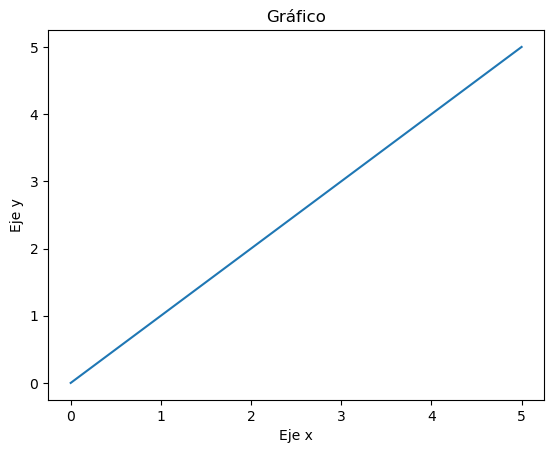

In [74]:
# Ejemplo de una linea simple
x = [0,1,2,3,4,5]
y = [0,1,2,3,4,5]

plt.plot(x,y)
plt.title ('Gráfico')
plt.xlabel ('Eje x')
plt.ylabel ('Eje y')
plt.show()

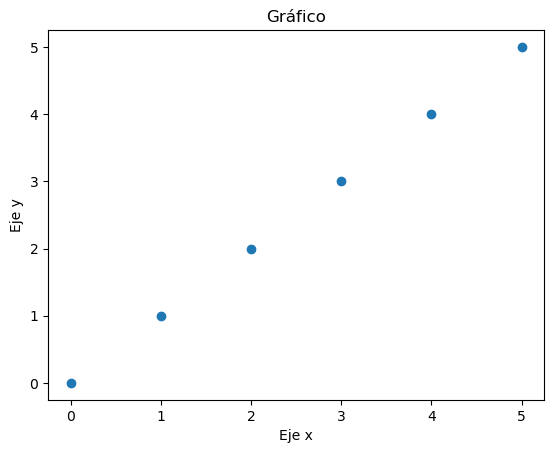

In [75]:
# Gráfico de dispersión
x = [0,1,2,3,4,5]
y = [0,1,2,3,4,5]

plt.scatter(x,y)
plt.title ('Gráfico')
plt.xlabel ('Eje x')
plt.ylabel ('Eje y')
plt.show()

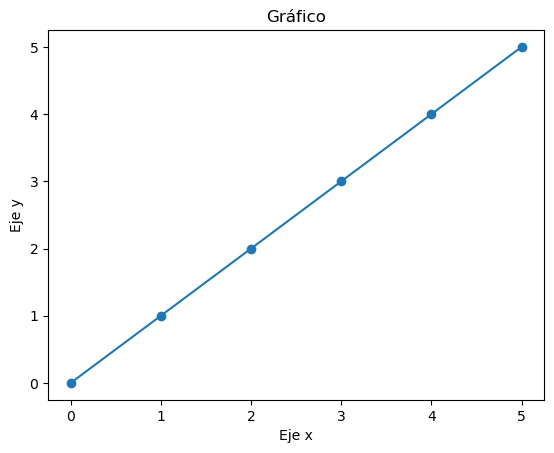

In [76]:
x = [0,1,2,3,4,5]
y = [0,1,2,3,4,5]

plt.plot(x,y)
plt.scatter (x,y)
plt.title ('Gráfico')
plt.xlabel ('Eje x')
plt.ylabel ('Eje y')
plt.show()

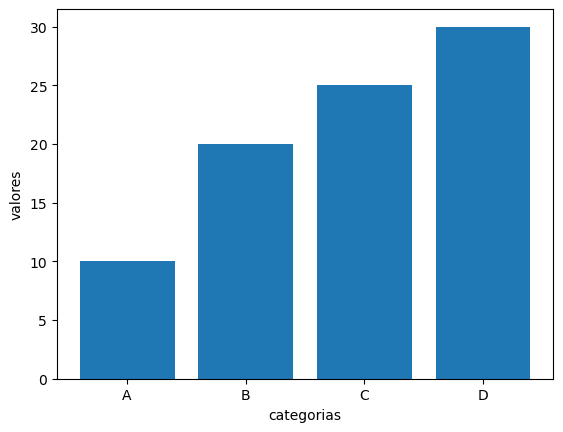

In [77]:
# Gráfico de Barras
categorias = ['A','B','C','D']
valores = [10, 20, 25,30]
plt.bar (categorias,valores)
plt.xlabel ('categorias')
plt.ylabel ('valores')
plt.show()


In [78]:
# Formato
plt.style.use('ggplot')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

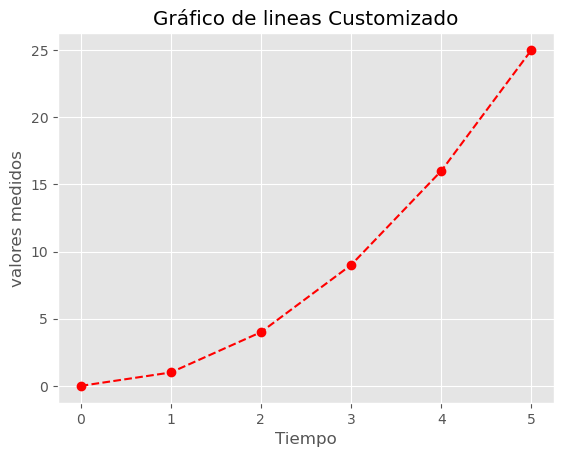

In [79]:
x = [0,1,2,3,4,5]
y = [0,1,4,9,16,25]
plt.plot(x,y,color='red',linestyle= '--',marker='o')
plt.title ('Gráfico de lineas Customizado')
plt.xlabel('Tiempo')
plt.ylabel('valores medidos')
plt.show()

# Introducción a Seaborn

Biblioteca de visualización para el trazado de gráficos estadísticos en Python. Está construido sobre la biblioteca matplotlib superior y también está estrechamente integrado con las estructuras de datos de pandas. Tiene como objetivo hacer de la visualización la parte central de la exploración y comprensión de los datos. Proporciona API orientadas a conjuntos de datos para que podamos cambiar entre diferentes representaciones visuales de las mismas variables para una mejor comprensión del conjunto de datos.

Diferentes categorías de trama en Seaborn: 

Los gráficos se utilizan básicamente para visualizar la relación entre variables. Esas variables pueden ser completamente numéricas o una categoría como un grupo, clase o división. Seaborn divide la trama en las siguientes categorías: 

Gráficos relacionales: este gráfico se utiliza para comprender la relación entre dos variables.

Gráficos categóricos: este gráfico trata sobre variables categóricas y cómo se pueden visualizar.

Gráficos de distribución: este gráfico se utiliza para examinar distribuciones univariadas y bivariadas.

Gráficos de regresión: los gráficos de regresión en Seaborn tienen como objetivo principal agregar una guía visual que ayude a enfatizar patrones en un conjunto de datos durante los análisis de datos exploratorios.

Gráficos matriciales: un gráfico matricial es una matriz de diagramas de dispersión.

Cuadrículas de múltiples gráficos: es un enfoque útil dibujar múltiples instancias del mismo gráfico en diferentes subconjuntos del conjunto de datos.

In [80]:
import seaborn as sns

In [81]:
# Importaremos un dataset de la libreria seaborn
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [82]:
# Tipos de Flores
set(data['species'])

{'setosa', 'versicolor', 'virginica'}

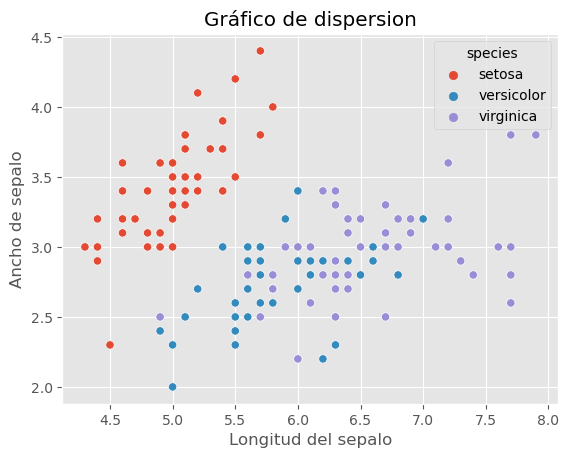

In [83]:
# Gráfico de dispersión
sns.scatterplot (x='sepal_length', y='sepal_width', hue='species', data=data)
plt.title('Gráfico de dispersion')
plt.xlabel('Longitud del sepalo')
plt.ylabel('Ancho de sepalo')
plt.show()

### Gráficos Personalizados


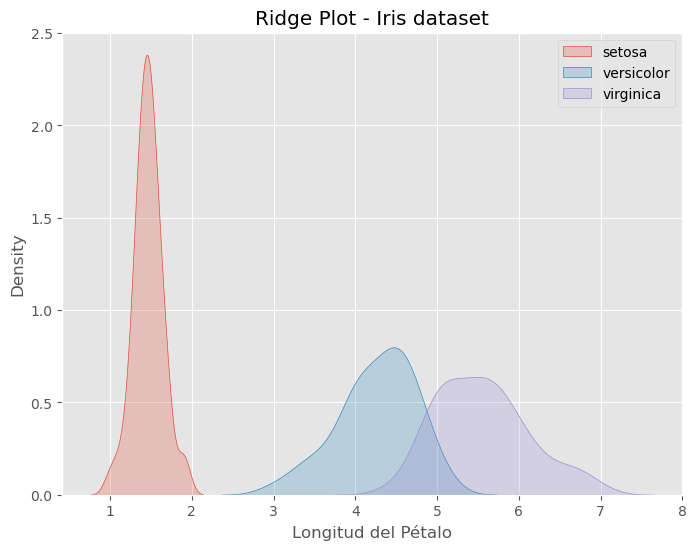

In [84]:
# Gráfico de Ridgeplot
setosa = data[data['species'] == 'setosa']
versicolor = data[data['species'] == 'versicolor']
virginica = data[data['species'] == 'virginica']

# Configuracón de figura y ejes
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel('Longitud del Pétalo')

# Crear Ridgeplot con función kdeplos
sns.kdeplot(data=setosa['petal_length'], label = 'setosa', ax = ax, fill=True)
sns.kdeplot(data=versicolor['petal_length'], label = 'versicolor', ax = ax, fill=True)
sns.kdeplot(data=virginica['petal_length'], label = 'virginica', ax = ax, fill=True)

# Ajustamos a posición de las leyendas
ax.legend(loc='upper right')
plt.title('Ridge Plot - Iris dataset')
plt.show()



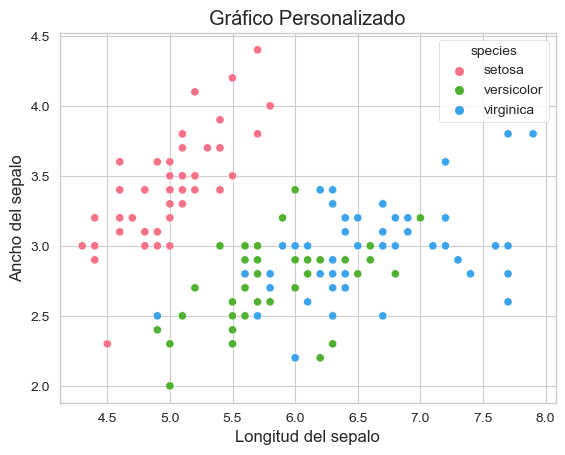

In [85]:
# Personalización de gráfico seaborn
sns.set_style('whitegrid')
palette = sns.color_palette('husl',3)

sns.scatterplot(x= 'sepal_length', y='sepal_width', hue= 'species', data=data, palette=palette)
plt.title('Gráfico Personalizado')
plt.xlabel('Longitud del sepalo')
plt.ylabel('Ancho del sepalo')
plt.show()

## Gráficos Avanzados

In [86]:
# Generamos datos de ejemplo

np.random.seed(42) #todos tendremos el mismo numero random
edad_autos = np.random.randint(0,20, size = 200)
precio_autos = 30 - edad_autos + np.random.normal(-3, 3, size = 200)
data = pd.DataFrame({
    'edad': edad_autos,
    'precio': precio_autos
})
data

,edad,precio
0,6,23.662535
1,19,9.816449
2,14,10.839106
3,10,16.190199
4,7,19.569613
...,...,...
195,15,12.807953
196,2,30.441000
197,19,9.213749
198,3,24.270218


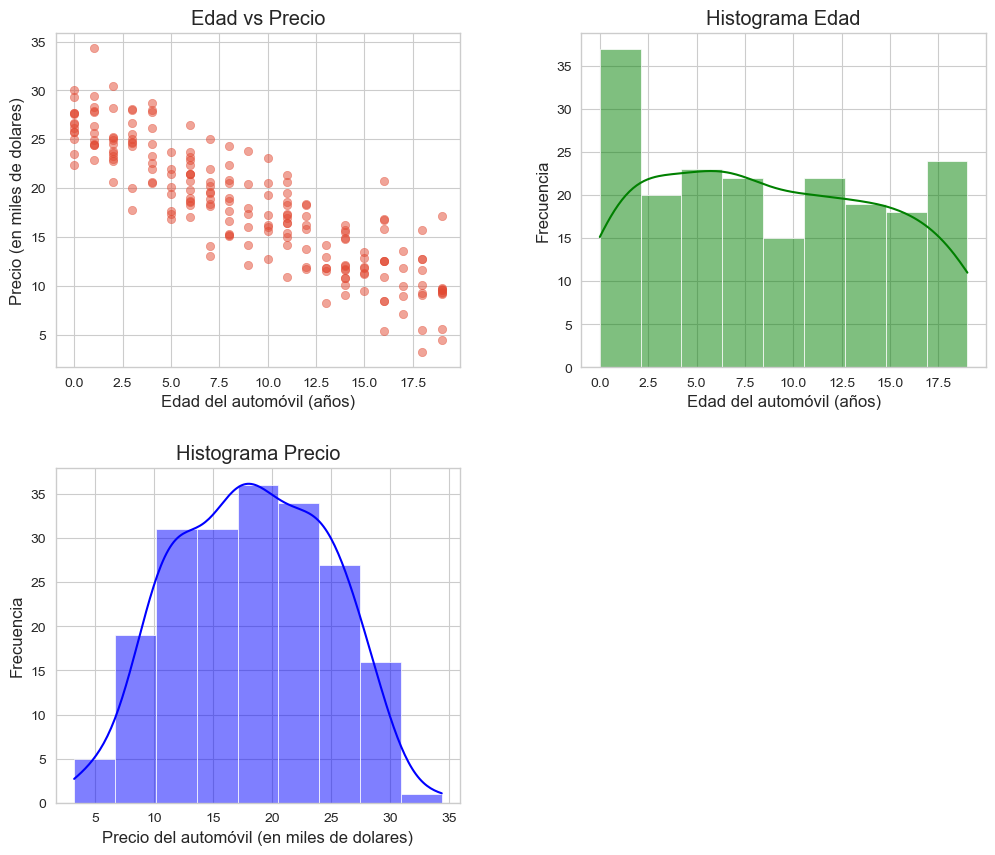

In [87]:
# Creación de Gráfico avanzado
fig, ax = plt.subplots(2,2,figsize=(12,10)) #lienzo

# Gráfico de dispersion
ax[0,0].scatter(data['edad'], data['precio'],alpha=0.5) #cuadrícula 1

ax[0,0].set_title('Edad vs Precio')
ax[0,0].set_xlabel('Edad del automóvil (años)')
ax[0,0].set_ylabel('Precio (en miles de dolares)')

# Histograma de la edad
sns.histplot(data['edad'], ax=ax[0,1], kde=True,color='g') #cuadrícula 2

ax[0,1].set_title('Histograma Edad')
ax[0,1].set_xlabel('Edad del automóvil (años)')
ax[0,1].set_ylabel('Frecuencia')

# Histograma del precio
sns.histplot(data['precio'], ax=ax[1,0], kde=True, color= 'b') #cuadrícula 3

ax[1,0].set_title('Histograma Precio')
ax[1,0].set_xlabel('Precio del automóvil (en miles de dolares)')
ax[1,0].set_ylabel('Frecuencia')

# Eliminamos el cuarto subplot
ax[1,1].axis('off')

# Ajustamos los gráficos
plt.subplots_adjust(wspace=0.3,hspace=0.3) 



In [88]:
sns.set(style='darkgrid')

#Cargamos el DataSet

df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [89]:
df.info() #columnas, tipo de datos, y valores nulos

df.describe() #datos cuantitativos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


[]

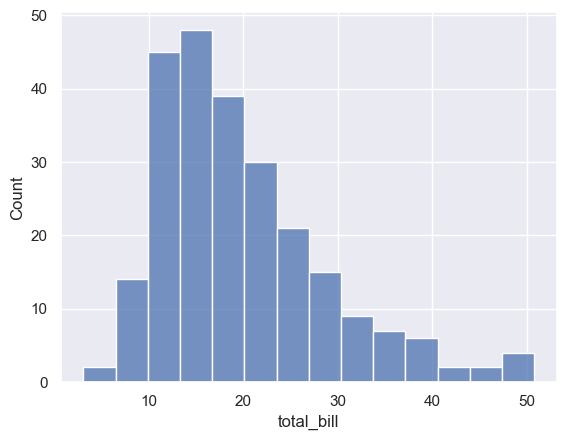

In [90]:
# Análisis univariado. Examina una variable a la vez. 

sns.histplot(data=df, x='total_bill')
plt.plot()

[]

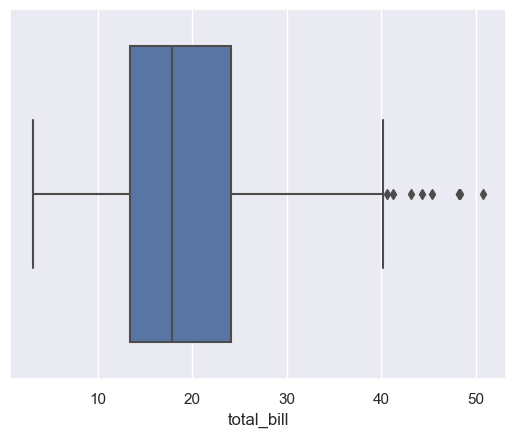

In [91]:
# Mismo grafico en boxplot
sns.boxplot(data=df, x='total_bill')
plt.plot()

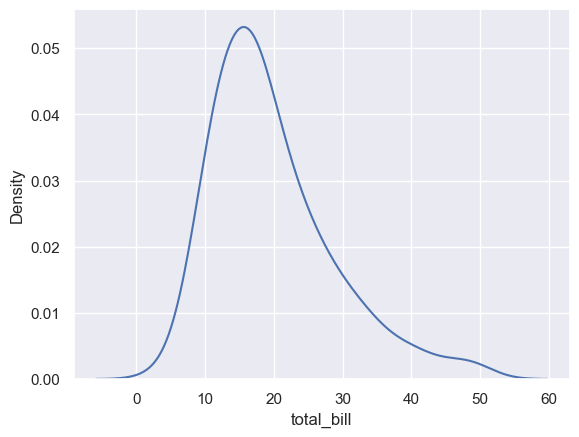

In [92]:
sns.kdeplot(data=df, x= 'total_bill')
plt.show()

### Análisis Bivariado y Multivariado

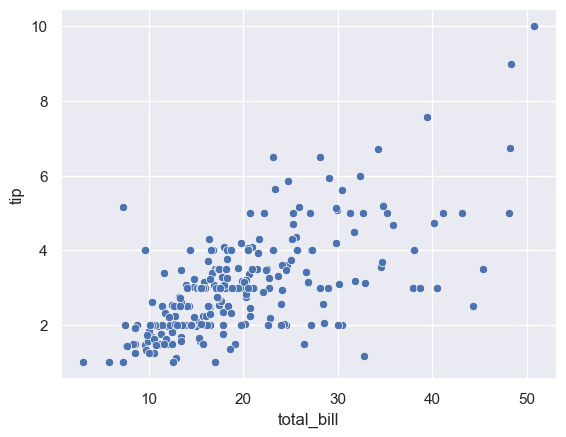

In [93]:
# Propina según cuenta
sns.scatterplot(data=df, x= 'total_bill',y= 'tip')
plt.show()

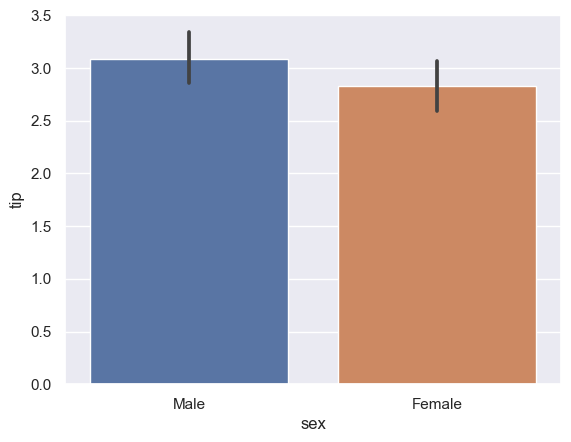

In [94]:
# Propina según sexo
sns.barplot(data=df, x='sex', y= 'tip')
plt.show()

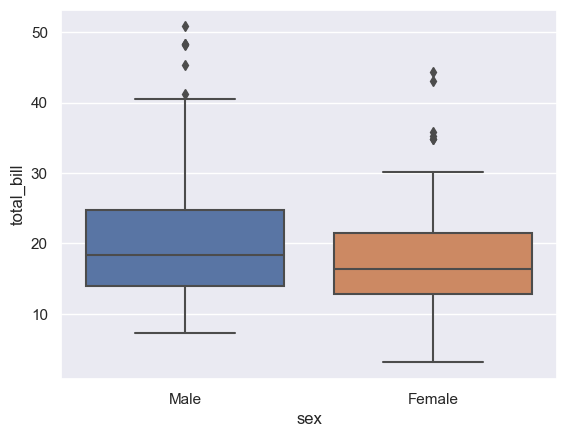

In [95]:
# Gasto por cuenta según sexo
sns.boxplot(data=df, x='sex',y='total_bill')
plt.show()

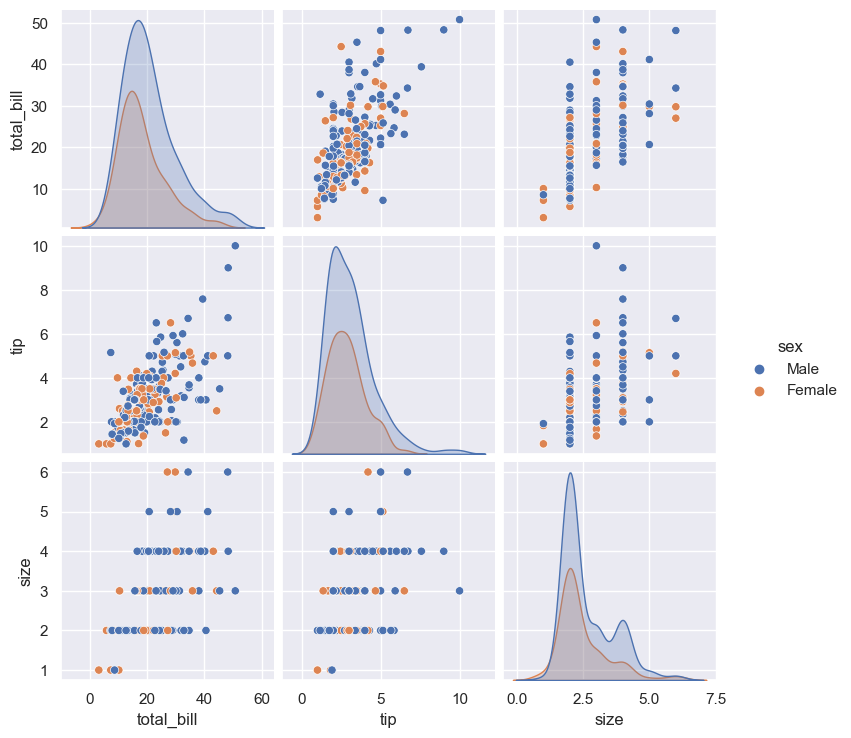

In [96]:
# Multivariado, analiza más de dos variable al mismo tiempo
sns.pairplot(df, hue='sex')
plt.show()